In [44]:
#librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix


In [45]:
#cargar los datos
df = pd.read_csv("movies.csv", encoding="latin1")

# 1. Exploración de datos

In [46]:
#exploracion de los datos
#mostrar las columanas
print("\n--Columnas:---")
print(list(df.columns))

#resumen del set de datos
print("\n--Resumen del set de datos:--")
print(df.describe())



--Columnas:---
['id', 'budget', 'genres', 'homePage', 'productionCompany', 'productionCompanyCountry', 'productionCountry', 'revenue', 'runtime', 'video', 'director', 'actors', 'actorsPopularity', 'actorsCharacter', 'originalTitle', 'title', 'originalLanguage', 'popularity', 'releaseDate', 'voteAvg', 'voteCount', 'genresAmount', 'productionCoAmount', 'productionCountriesAmount', 'actorsAmount', 'castWomenAmount', 'castMenAmount']

--Resumen del set de datos:--
                  id        budget       revenue       runtime    popularity  \
count   10000.000000  1.000000e+04  1.000000e+04  10000.000000  10000.000000   
mean   249876.829300  1.855163e+07  5.673793e+07    100.268100     51.393907   
std    257380.109004  3.662669e+07  1.495854e+08     27.777829    216.729552   
min         5.000000  0.000000e+00  0.000000e+00      0.000000      4.258000   
25%     12286.500000  0.000000e+00  0.000000e+00     90.000000     14.577750   
50%    152558.000000  5.000000e+05  1.631245e+05    10

In [47]:
#obtener el tipo de datos
print("\n----Tipo de datos:---")
print(df.dtypes)
tipos_de_datos = df.dtypes.value_counts()
print('resumen:')
print(tipos_de_datos)



----Tipo de datos:---
id                             int64
budget                         int64
genres                        object
homePage                      object
productionCompany             object
productionCompanyCountry      object
productionCountry             object
revenue                      float64
runtime                        int64
video                         object
director                      object
actors                        object
actorsPopularity              object
actorsCharacter               object
originalTitle                 object
title                         object
originalLanguage              object
popularity                   float64
releaseDate                   object
voteAvg                      float64
voteCount                      int64
genresAmount                   int64
productionCoAmount             int64
productionCountriesAmount      int64
actorsAmount                   int64
castWomenAmount               object
castMenAmount  

---
# 2. Tipo de variables 

### Variables:
1. Id: Id de la película 

2. popularity: Índice de popularidad de la película calculado semanalmente 

3. budget: El presupuesto para la película. 

4. revenue: El ingreso de la película. 

5. original_title: El título original de la película, en su idioma original. 

6. originalLanguage: Idioma original en que se encuentra la película 

7. title: El título de la película traducido al inglés 

8. homePage: La página de inicio de la película 

9. video: Si tiene videos promocionales o no 

10. director: Director de la película 

11. runtime: La duración de la película. 

12. genres: El género de la película. 

13. genresAmount: Cantidad de géneros que representan la película 

14. productionCompany: Las compañías productoras de la película. 

15. productionCoAmount: Cantidad de compañías productoras que participaron en la película 

16. productionCompanyCountry: Países de las compañías productoras de la película 

17. productionCountry: Países en los que se llevó a cabo la producción de la película 

18. productionCountriesAmount: Cantidad de países en los que se rodó la película 


19. releaseDate: Fecha de lanzamiento de la película 

20. voteCount: El número de votos en la plataforma para la película. 

21. voteAvg: El promedio de los votos en la plataforma para la película 


22. actors: Actores que participan en la película (Elenco) 

23. actorsPopularity: Índice de popularidad del elenco de la película. 

24. actorsCharacter: Personaje que interpreta cada actor en la película 

25. actorsAmount: Cantidad de personas que actúan en la película 

26. castWomenAmount: Cantidad de actrices en el elenco de la película 

27. castMenAmount: Cantidad de actores en el elenco de la película. 

## Tipo de Varibles
### Variables Cualitativas:
#### Ordinales:
- No hay
 
#### Nominales:
- original_title
- originalLanguage
- title
- homePage
- director
- genres
- productionCompany
- productionCompanyCountry
- productionCountry
- video
- actors
- actorsCharacter


### Variables Cuantitativas:
#### Continuas:
- popularity
- revenue
- voteAvg


#### Discretas:
- Id
- releaseDate
- budget
- runtime
- genresAmount
- productionCoAmount
- productionCountriesAmount
- voteCount
- actorsPopularity
- actorsAmount
- castWomenAmount
- castMenAmount


In [48]:
# revision de valores duplicados
print(df.duplicated().sum())

0


In [49]:
# eliminar valores nulos o llenarlos con la media
df = df.dropna()

#llenar los valores nulos de video
df['video'].fillna('FALSE', inplace=True)

#calcular la media de solo las columnas numericas
mean_values = df.select_dtypes(include=[np.number]).mean()

#reemplazar valores nulos con la media
df.fillna(mean_values, inplace=True)


C:\Users\Francis\AppData\Local\Temp\ipykernel_28424\2643670234.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['video'].fillna('FALSE', inplace=True)


In [50]:
#convertir los tipos de datos
#convertir la columna video a numerica
df['video'] = df['video'].apply(lambda x: 1 if str(x).upper() == 'TRUE' else 0)

#convertir la columna releaseDate a datetime
df['releaseDate'] = pd.to_datetime(df['releaseDate'])

#convertir las columnas popularity, revenue y voteAvg a enteros
df['popularity'] = df['popularity'].astype(int)
df['revenue'] = df['revenue'].astype(int)
df['voteAvg'] = df['voteAvg'].astype(int)

#asegurarse que todas las variables sean de tipo int
df['castWomenAmount'] = df['castWomenAmount'].astype(int)
df['castMenAmount'] = df['castMenAmount'].astype(int)

In [51]:
#normalizacion de datos
#no se deben de normalizar todos los dato, entonces los de 
#nobmres de las columans que no se van a normalizar, porque no es necesario
#columans que si se van a normalizar
numeric_columns = ['actorsAmount', 'runtime']
print(numeric_columns)
#normalizar los datos
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
print(df.head())


['actorsAmount', 'runtime']
    id     budget                    genres  \
0    5    4000000              Crime|Comedy   
10  22  140000000  Adventure|Fantasy|Action   
11  24   30000000              Action|Crime   
14  28   31500000                 Drama|War   
16  35   75000000   Animation|Comedy|Family   

                                             homePage  \
0           https://www.miramax.com/movie/four-rooms/   
10  http://disney.go.com/disneyvideos/liveaction/p...   
11    http://www.miramax.com/movie/kill-bill-volume-1   
14                       http://www.apocalypsenow.com   
16                      http://www.simpsonsmovie.com/   

                                    productionCompany  \
0                                Miramax|A Band Apart   
10       Walt Disney Pictures|Jerry Bruckheimer Films   
11                               Miramax|A Band Apart   
14                   United Artists|American Zoetrope   
16  AKOM Production Company|Gracie Films|Rough Dra...   

   

---
# 3. Distribución normal para variables cualitativas y cuantitativas

### Variables cualitativas
Verificar si tienen una distribución normal con la prueba de ***Kolmogorov - Smirnov***

**Popularity**

In [53]:
pop = df['popularity']

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = stats.kstest(pop, 'norm', args=(np.mean(pop), np.std(pop)))

# Imprimir los resultados
print("Estadístico de prueba (ks_statistic) = %.20f" % ks_statistic)
print("p-value = %.20f" % p_value)

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: los datos NO provienen de una distribución normal.")
else:
    print("No se rechaza la hipótesis nula: los datos parecen provenir de una distribución normal.")

Estadístico de prueba (ks_statistic) = 0.42594086300522038258
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos NO provienen de una distribución normal.


**Revenue**

In [55]:
rev = df['revenue']

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = stats.kstest(rev, 'norm', args=(np.mean(rev), np.std(rev)))

# Imprimir los resultados
print("Estadístico de prueba (ks_statistic) = %.20f" % ks_statistic)
print("p-value = %.20f" % p_value)

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: los datos NO provienen de una distribución normal.")
else:
    print("No se rechaza la hipótesis nula: los datos parecen provenir de una distribución normal.")

Estadístico de prueba (ks_statistic) = 0.33160419033285015722
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos NO provienen de una distribución normal.


**Budget**

In [56]:
b = df['budget']

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = stats.kstest(b, 'norm', args=(np.mean(b), np.std(b)))

# Imprimir los resultados
print("Estadístico de prueba (ks_statistic) = %.20f" % ks_statistic)
print("p-value = %.20f" % p_value)

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: los datos NO provienen de una distribución normal.")
else:
    print("No se rechaza la hipótesis nula: los datos parecen provenir de una distribución normal.")

Estadístico de prueba (ks_statistic) = 0.27983203336928369476
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos NO provienen de una distribución normal.


---
## 4. Preguntas a responder 

a. **¿Cuáles son las 10 películas que contaron con más presupuesto?**

In [57]:
top10 = df.sort_values(by="budget", ascending=False).head(10)
print(top10[['title', 'budget']])

                                             title     budget
716    Pirates of the Caribbean: On Stranger Tides  380000000
4710                       Avengers: Age of Ultron  365000000
5952                             Avengers: Endgame  356000000
5953                        Avengers: Infinity War  300000000
163       Pirates of the Caribbean: At World's End  300000000
607                               Superman Returns  270000000
7134                                 The Lion King  260000000
280                                   Spider-Man 3  258000000
2508  Harry Potter and the Deathly Hallows: Part 1  250000000
4855     The Hobbit: The Battle of the Five Armies  250000000


**c.  ¿Cuál es la película que más votos tuvo?**

In [59]:
masVotada = df.sort_values(by='voteCount', ascending=False).iloc[0]
print(f'La película con más votos es "{masVotada["title"]}" con {masVotada["voteCount"]} votos.')

La película con más votos es "Inception" con 30788 votos.


**d. ¿Cuántas películas se hicieron en cada año? ¿En qué año se hicieron más
películas? Haga un gráfico de barras**

El año con más películas fue 2021 con 333 películas.


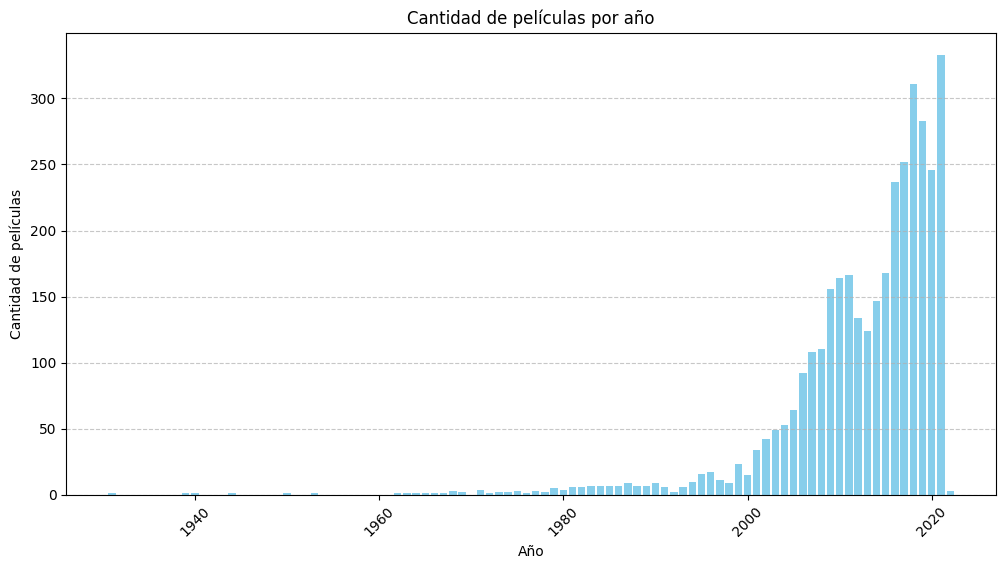

In [60]:


# Convertir la columna de fecha de lanzamiento a tipo datetime para poder manejar los datos despues 
df["releaseDate"] = pd.to_datetime(df["releaseDate"], errors="coerce")
df["year"] = df["releaseDate"].dt.year

# Contar cuántas películas se hicieron en cada año
pelis_anio = df["year"].value_counts().sort_index()

# Encontrar el año con más películas
max_year = pelis_anio.idxmax()
max_movies = pelis_anio.max()

print(f'El año con más películas fue {max_year} con {max_movies} películas.')

# Graficar la cantidad de películas por año
plt.figure(figsize=(12,6))
plt.bar(pelis_anio.index, pelis_anio.values, color="skyblue")
plt.xlabel("Año")
plt.ylabel("Cantidad de películas")
plt.title("Cantidad de películas por año")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()
